### Стандартные импорты и настройки

In [75]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [76]:
from scipy.cluster.vq import whiten, kmeans2

In [77]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'c52b7825851b4357af3e06c1888152f0' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [78]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')
# teams

In [79]:
for team in teams:
    players = call_api(team['_links']['players']['href'], 'players')
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    d_goals = 0  # количество забитых мячей противнику
    m_goals = 0  # количество пропущенных мячей от противника

    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            if f['result']['goalsHomeTeam']:
                d_goals += f['result']['goalsHomeTeam']
            else:
                d_goals += 0
        else:
            d_goals += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
        
        
        if team['name'] == f['homeTeamName']:
            if f['result']['goalsAwayTeam']:
                m_goals += f['result']['goalsAwayTeam']
            else:
                m_goals += 0
        else:
            m_goals += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
        
        
        
    print('Team "{}", {} d_goals, {} m_goals'.format(team['name'], d_goals, m_goals))
    team['players'] = players
    team['d_goals'] = d_goals
    team['m_goals'] = m_goals

Team "FC Rio Ave", 37 d_goals, 36 m_goals
Team "FC Porto", 78 d_goals, 21 m_goals
Team "Moreirense FC", 27 d_goals, 45 m_goals
Team "FC Paços de Ferreira", 31 d_goals, 40 m_goals
Team "Sporting CP", 67 d_goals, 38 m_goals
Team "Maritimo Funchal", 32 d_goals, 30 m_goals
Team "CD Tondela", 23 d_goals, 50 m_goals
Team "SL Benfica", 75 d_goals, 30 m_goals
Team "Boavista Porto FC", 28 d_goals, 32 m_goals
Team "FC Arouca", 30 d_goals, 50 m_goals
Team "Vitoria Setubal", 27 d_goals, 35 m_goals
Team "C.F. Os Belenenses", 23 d_goals, 41 m_goals
Team "Vitoria Guimaraes", 49 d_goals, 33 m_goals
Team "Sporting Braga", 46 d_goals, 32 m_goals
Team "GD Estoril Praia", 29 d_goals, 38 m_goals
Team "Feirense", 27 d_goals, 44 m_goals
Team "Nacional Funchal", 19 d_goals, 50 m_goals
Team "G.D. Chaves", 31 d_goals, 34 m_goals


In [81]:
team_for_pd = []
for team in teams:
    if team['players']:
        team_for_pd.append({'name': team['name'], 'd_goals': team['d_goals'], 'm_goals': team['m_goals']})
team_for_pd

[{'d_goals': 37, 'm_goals': 36, 'name': 'FC Rio Ave'},
 {'d_goals': 78, 'm_goals': 21, 'name': 'FC Porto'},
 {'d_goals': 27, 'm_goals': 45, 'name': 'Moreirense FC'},
 {'d_goals': 31, 'm_goals': 40, 'name': 'FC Paços de Ferreira'},
 {'d_goals': 67, 'm_goals': 38, 'name': 'Sporting CP'},
 {'d_goals': 32, 'm_goals': 30, 'name': 'Maritimo Funchal'},
 {'d_goals': 23, 'm_goals': 50, 'name': 'CD Tondela'},
 {'d_goals': 75, 'm_goals': 30, 'name': 'SL Benfica'},
 {'d_goals': 28, 'm_goals': 32, 'name': 'Boavista Porto FC'},
 {'d_goals': 30, 'm_goals': 50, 'name': 'FC Arouca'},
 {'d_goals': 27, 'm_goals': 35, 'name': 'Vitoria Setubal'},
 {'d_goals': 23, 'm_goals': 41, 'name': 'C.F. Os Belenenses'},
 {'d_goals': 49, 'm_goals': 33, 'name': 'Vitoria Guimaraes'},
 {'d_goals': 46, 'm_goals': 32, 'name': 'Sporting Braga'},
 {'d_goals': 29, 'm_goals': 38, 'name': 'GD Estoril Praia'},
 {'d_goals': 19, 'm_goals': 50, 'name': 'Nacional Funchal'}]

In [82]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,d_goals,m_goals,name
0,37,36,FC Rio Ave
1,78,21,FC Porto
2,27,45,Moreirense FC
3,31,40,FC Paços de Ferreira
4,67,38,Sporting CP
5,32,30,Maritimo Funchal
6,23,50,CD Tondela
7,75,30,SL Benfica
8,28,32,Boavista Porto FC
9,30,50,FC Arouca


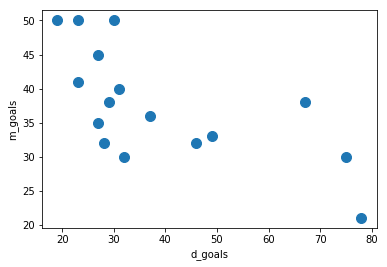

In [83]:
teams_pd.plot.scatter(x='d_goals', y='m_goals', s=100)

In [84]:
del teams_pd['name']
teams_pd

,d_goals,m_goals
0,37,36
1,78,21
2,27,45
3,31,40
4,67,38
5,32,30
6,23,50
7,75,30
8,28,32
9,30,50


In [85]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 2.01993672,  4.51338037],
       [ 4.25824498,  2.63280521],
       [ 1.47400788,  5.64172546],
       [ 1.69237942,  5.01486707],
       [ 3.65772325,  4.76412372],
       [ 1.7469723 ,  3.7611503 ],
       [ 1.25563634,  6.26858384],
       [ 4.09446633,  3.7611503 ],
       [ 1.52860076,  4.01189366],
       [ 1.63778653,  6.26858384],
       [ 1.47400788,  4.38800869],
       [ 1.25563634,  5.14023875],
       [ 2.67505134,  4.13726533],
       [ 2.51127268,  4.01189366],
       [ 1.58319365,  4.76412372],
       [ 1.0372648 ,  6.26858384]])

Сделаем 3 кластера

In [86]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 1.35117389,  6.11186924],
        [ 1.61438958,  4.51338037],
        [ 3.43935172,  3.86144765]]),
 array([1, 2, 0, 1, 2, 1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 0]))

Зададим цвета для каждого кластера

In [87]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['g',
 'b',
 'r',
 'g',
 'b',
 'g',
 'r',
 'b',
 'g',
 'r',
 'g',
 'g',
 'b',
 'b',
 'g',
 'r']

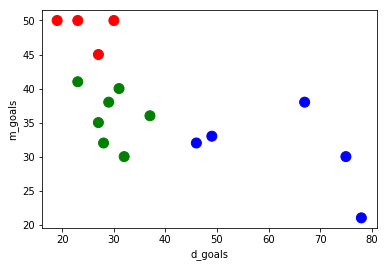

In [88]:
teams_pd.plot.scatter(x='d_goals', y='m_goals', c=colors, s=100)

Теперь попробуем сделать 5 кластеров.

In [89]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[ 1.35117389,  6.11186924],
        [ 2.31109877,  3.9701031 ],
        [ 3.87609479,  4.26263701],
        [ 4.25824498,  2.63280521],
        [ 1.59229246,  4.63875204]]),
 array([4, 3, 0, 4, 2, 1, 0, 2, 4, 0, 4, 4, 1, 1, 4, 0]))

In [90]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['m',
 'y',
 'r',
 'm',
 'b',
 'g',
 'r',
 'b',
 'm',
 'r',
 'm',
 'm',
 'g',
 'g',
 'm',
 'r']

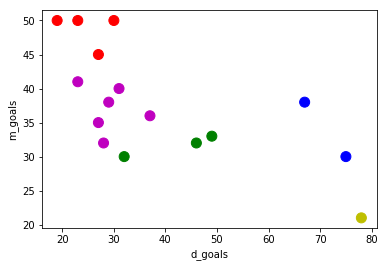

In [92]:
teams_pd.plot.scatter(x='d_goals', y='m_goals', c=colors, s=100)